<a href="https://colab.research.google.com/github/chakradhar915/Chakradhar_INFO5502_Spring2022/blob/main/INFO_5502_Final_Exam_Spring2022_Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### INFO 5502 Final Exam (05/12/2022, 240 points in total)

<span style='background:yellow'>**Question 3 (100 pt, each sub-question is 10 pt).**</span> 

Part A: Given Inetd dataset, an intrusion detection dataset that contains 2 columns. The first column represents a process ID number (PID) and the second column represents a system call. The goal is to extract the entire system call sequence by its PID, then tokenize and parse each sequence into 25-grams. After this, we’ll split the data into training and testing sets. Next, we ensure data quality in the training dataset by removing duplicate sequences within each class and overlapped sequences between both classes. To ensure a fair evaluation, we also clean the testing set by repeating the previous step. You will implement a Decision Tree model to train and test on the training set and testing set that we just clean. 


Part B: As the data type is sequential, we want to know how similar the sequences from both classes are and visualize how the similarity scores vary in different sequence lengths. Compute a cosine similarity score of 100 random pairs from both classes and get a median cosine similarity. Repeat this step in different sequence lengths (5, 10, 15, and 20). Plot a line chart to visualize how the median cosine similarities vary through sequence lengths of 5 to 25. 

You can download the datasets from github: https://github.com/unt-iialab/info5502-spring2022/tree/main/finalexam/q4


Step by step instructions and questions:

(1) Attached are the Normal and Intrusion data folders. Read in the data and store them in two separate dataframes. Combine the system calls (the second column) from the same PID (the first column) into a sequence or a string. 

(2) Parse an entire sequence into smaller sequences of size 25. (Hint: Use word_tokenize and ngrams from nltk library to parse).

(3) Add labels to the data, and partition the labeled data into training data and testing data with a ratio of 70/30.

(4) As the dataset has a lot of duplicate sequences, make sure that the testing data only contain unique sequences and that these sequences do not exist in the training data. Condense training data and testing data into two sets. Take the difference between the testing set and training set to remove the overlapped sequences from the testing data. 

(5) The sequences from each class can be repetitive, and some of these sequences may have different labels. Therefore, we need to remove the duplicate sequences within each class and the overlapped sequences from the Intrusion class. Start out by separating the Normal class and Intrusion class in the training data. Use the same concept in Question 4 to remove duplicate sequences and overlapped sequences from the training data.

(6) Repeat Question 5 to clean the testing data.

(7) Bootstrap the training data to get the same number of sequences from each class. Train and evaluate a Decision Tree model using the training data and testing data that we just clean. How is the performance?

(8) Randomly sample 100 pairs of sequences from both classes and calculate the median cosine similarity.

(9) Refer back to Question 2, parse the data into a length of 5, 10, 15, and 20. Clean the data from each class using Question 5. For each sequence length, calculate the median cosine similarity of 100 random pairs of sequences from both classes. 

(10) Plot a line chart to visualize how the median cosine similarities vary through different sequence lengths from 5 to 25.


In [130]:
import pandas as pd
import numpy as np
import re
from nltk.util import ngrams
import re
import matplotlib.pyplot as plt
import seaborn as sns



normal_Set=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int',sep=' ',header=None)
normal_Set

,0,1
0,167,90
1,167,125
2,167,125
3,167,106
4,167,5
...,...,...
536,2669,6
537,2669,6
538,2669,6
539,2669,6


In [131]:
intrusion_Set=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int',sep=' ',header=None)
intrusion_Set

,0,1
0,167,90
1,167,125
2,167,125
3,167,106
4,167,5
...,...,...
8366,4470,6
8367,4470,6
8368,4470,6
8369,4470,6


In [148]:
#creating the lables for both the columns 
intrusion_Set.columns = ['PID', 'SystemCalls']
normal_Set.columns = ['PID', 'SystemCalls']
print(intrusion_Set)
print()
print(normal_Set)

       PID  SystemCalls
0      167           90
1      167          125
2      167          125
3      167          106
4      167            5
...    ...          ...
8366  4470            6
8367  4470            6
8368  4470            6
8369  4470            6
8370  4470           11

[8371 rows x 2 columns]

      PID  SystemCalls
0     167           90
1     167          125
2     167          125
3     167          106
4     167            5
..    ...          ...
536  2669            6
537  2669            6
538  2669            6
539  2669            6
540  2669           11

[541 rows x 2 columns]


In [149]:
int_dict = {}
nor_dict = {}

# combining all the pid values in one row for intrusion_Set
for p_id in list(set(intrusion_Set['PID'].values)):
    int_dict[p_id] = " ".join(str(value) for value in list(intrusion_Set[intrusion_Set['PID'] == p_id]['SystemCalls'].values))

print(int_dict[168])

66 12 5 63 63 63 6 5 20 108 90 4 6 91 76 5 108 90 3 126 126 5 45 108 90 3 3 6 91 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 45 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 3 6 91 126 126 67 67 67 67 67 82 55 102 55 126 78 2 126 6 82 114 114 119 126 67 13 27 72 119 13 67 27 126 82 55 102 55 126 78 2 126 6 82 114 114 119 126 67 13 27 72 119 13 67 27 126 82 55 102 55 126 2 126 6 82 114 114 119 126 67 13 27 72 119 13 67 27 126 82 55 102 55 126 2 126 6 82 55 102 55 126 2 126 6 82 55 102 55 126 2 126 6 82 5

In [150]:
# combining all the pid values in one row for normal_Set

for p_id in list(set(normal_Set['PID'].values)):
    nor_dict[p_id] = " ".join(str(value) for value in list(normal_Set[normal_Set['PID'] == p_id]['SystemCalls'].values))
  
nor_dict

{167: '90 125 125 106 5 90 6 5 3 90 90 90 90 6 125 91 125 125 125 136 49 24 47 50 45 45 5 106 106 106 106 106 2 1',
 168: '66 12 5 63 63 63 6 5 20 108 90 4 6 91 76 5 108 90 3 126 126 5 45 108 90 3 3 6 91 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 45 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 126 126 5 108 90 3 19 6 91 102 102 102 102 3 6 91 126 126 67 67 67 67 67 82 55 102 55 126 78 2 126 6 82 114 114 119 126 67 13 27 72 119 13 67 27 126 82',
 2669: '126 5 45 108 90 3 19 6 91 63 6 63 63 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6

In [151]:

int_list = []
nor_list = []

# generating the sequence of 25 by using the ngrams 

for key in int_dict.keys():
    s = int_dict[key]
    # spliting the data with the length 25
    ts = [t for t in s.split(" ") if t != ""]
    
    for e in list(ngrams(ts, 25)):
      # appending the all the 25 values 
        int_list.append(e)
        
for key in nor_dict.keys():
    s = nor_dict[key]
    # spliting the data with the length 25
    ts = [t for t in s.split(" ") if t != ""]
    
    for e in list(ngrams(ts, 25)):
       # appending the all the 25 values 
        nor_list.append(e) 
#printing the 25 values of the each sequence for int_list
print(int_list)

[('126', '5', '45', '108', '90', '3', '19', '6', '91', '63', '6', '63', '63', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6'), ('5', '45', '108', '90', '3', '19', '6', '91', '63', '6', '63', '63', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6'), ('45', '108', '90', '3', '19', '6', '91', '63', '6', '63', '63', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6'), ('108', '90', '3', '19', '6', '91', '63', '6', '63', '63', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6'), ('90', '3', '19', '6', '91', '63', '6', '63', '63', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6'), ('3', '19', '6', '91', '63', '6', '63', '63', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6'), ('19', '6', '91', '63', '6', '63', '63', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6'), ('6', '91', '63', '6', '63', '63', '6', '6', '6', '6', '6

In [152]:
#printing the 25 values of the each sequence for nor_list
print(nor_list)

[('66', '12', '5', '63', '63', '63', '6', '5', '20', '108', '90', '4', '6', '91', '76', '5', '108', '90', '3', '126', '126', '5', '45', '108', '90'), ('12', '5', '63', '63', '63', '6', '5', '20', '108', '90', '4', '6', '91', '76', '5', '108', '90', '3', '126', '126', '5', '45', '108', '90', '3'), ('5', '63', '63', '63', '6', '5', '20', '108', '90', '4', '6', '91', '76', '5', '108', '90', '3', '126', '126', '5', '45', '108', '90', '3', '3'), ('63', '63', '63', '6', '5', '20', '108', '90', '4', '6', '91', '76', '5', '108', '90', '3', '126', '126', '5', '45', '108', '90', '3', '3', '6'), ('63', '63', '6', '5', '20', '108', '90', '4', '6', '91', '76', '5', '108', '90', '3', '126', '126', '5', '45', '108', '90', '3', '3', '6', '91'), ('63', '6', '5', '20', '108', '90', '4', '6', '91', '76', '5', '108', '90', '3', '126', '126', '5', '45', '108', '90', '3', '3', '6', '91', '5'), ('6', '5', '20', '108', '90', '4', '6', '91', '76', '5', '108', '90', '3', '126', '126', '5', '45', '108', '90', '3

In [153]:
# creating the data frame with the int_list
int_df = pd.DataFrame(int_list)
# creating the data frame with the nor_list
nor_df = pd.DataFrame(nor_list)

# adding the class as 1 in int_df and class as 0 in nor_df
int_df['class'] = 1
nor_df['class'] = 0

int_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,class
0,126,5,45,108,90,3,19,6,91,63,...,6,6,6,6,6,6,6,6,6,1
1,5,45,108,90,3,19,6,91,63,6,...,6,6,6,6,6,6,6,6,6,1
2,45,108,90,3,19,6,91,63,6,63,...,6,6,6,6,6,6,6,6,6,1
3,108,90,3,19,6,91,63,6,63,63,...,6,6,6,6,6,6,6,6,6,1
4,90,3,19,6,91,63,6,63,63,6,...,6,6,6,6,6,6,6,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7622,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,1
7623,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,1
7624,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,1
7625,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,1


In [154]:
#print the nor_df
nor_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,class
0,66,12,5,63,63,63,6,5,20,108,...,108,90,3,126,126,5,45,108,90,0
1,12,5,63,63,63,6,5,20,108,90,...,90,3,126,126,5,45,108,90,3,0
2,5,63,63,63,6,5,20,108,90,4,...,3,126,126,5,45,108,90,3,3,0
3,63,63,63,6,5,20,108,90,4,6,...,126,126,5,45,108,90,3,3,6,0
4,63,63,6,5,20,108,90,4,6,91,...,126,5,45,108,90,3,3,6,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,90,6,5,3,90,90,90,90,6,125,...,24,47,50,45,45,5,106,106,106,0
465,6,5,3,90,90,90,90,6,125,91,...,47,50,45,45,5,106,106,106,106,0
466,5,3,90,90,90,90,6,125,91,125,...,50,45,45,5,106,106,106,106,106,0
467,3,90,90,90,90,6,125,91,125,125,...,45,45,5,106,106,106,106,106,2,0


In [155]:
#creating the new data frame to combine the two datasets
concat_df = pd.DataFrame()

# first appending the int_df to empty data frame 
concat_df = concat_df.append(int_df)
#next appending the nor)df to the int_df data frame
concat_df = concat_df.append(nor_df)

concat_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,class
0,126,5,45,108,90,3,19,6,91,63,...,6,6,6,6,6,6,6,6,6,1
1,5,45,108,90,3,19,6,91,63,6,...,6,6,6,6,6,6,6,6,6,1
2,45,108,90,3,19,6,91,63,6,63,...,6,6,6,6,6,6,6,6,6,1
3,108,90,3,19,6,91,63,6,63,63,...,6,6,6,6,6,6,6,6,6,1
4,90,3,19,6,91,63,6,63,63,6,...,6,6,6,6,6,6,6,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,90,6,5,3,90,90,90,90,6,125,...,24,47,50,45,45,5,106,106,106,0
465,6,5,3,90,90,90,90,6,125,91,...,47,50,45,45,5,106,106,106,106,0
466,5,3,90,90,90,90,6,125,91,125,...,50,45,45,5,106,106,106,106,106,0
467,3,90,90,90,90,6,125,91,125,125,...,45,45,5,106,106,106,106,106,2,0


In [156]:
# drop the all the similar sequences
concat_df = concat_df.drop_duplicates(subset = concat_df.columns[:-1], keep = 'last')
concat_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,class
473,126,78,2,126,6,82,114,114,119,126,...,67,27,126,82,55,102,55,126,78,1
474,78,2,126,6,82,114,114,119,126,67,...,27,126,82,55,102,55,126,78,2,1
475,2,126,6,82,114,114,119,126,67,13,...,126,82,55,102,55,126,78,2,126,1
476,126,6,82,114,114,119,126,67,13,27,...,82,55,102,55,126,78,2,126,6,1
477,6,82,114,114,119,126,67,13,27,72,...,55,102,55,126,78,2,126,6,82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,90,6,5,3,90,90,90,90,6,125,...,24,47,50,45,45,5,106,106,106,0
465,6,5,3,90,90,90,90,6,125,91,...,47,50,45,45,5,106,106,106,106,0
466,5,3,90,90,90,90,6,125,91,125,...,50,45,45,5,106,106,106,106,106,0
467,3,90,90,90,90,6,125,91,125,125,...,45,45,5,106,106,106,106,106,2,0


In [157]:
# build the model using the decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X = concat_df.drop("class", axis = 1)
y = concat_df['class']
#diving the train and test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 0)


dtclassifier = DecisionTreeClassifier(max_depth = 10)
dtclassifier.fit(X_train, y_train)
y_pred = dtclassifier.predict(X_valid)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        22
           1       0.93      0.87      0.90        45

    accuracy                           0.87        67
   macro avg       0.84      0.87      0.85        67
weighted avg       0.87      0.87      0.87        67



In [158]:

#creating the dictionary for cos_sim
cos_sim_ngram = {}

for ngram in range(5, 26, 5):

    intrusion_Set = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-intrusion.int", sep = " ", header = None)
    normal_Set = pd.read_csv("https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/finalexam/q4/inetd-normal.int", sep = " ", header = None)

    intrusion_Set.columns = ['PID', 'SystemCalls']
    normal_Set.columns = ['PID', 'SystemCalls']

    int_dict = {}
    nor_dict = {}

    for pid in list(set(intrusion_Set['PID'].values)):
        int_dict[pid] = " ".join(str(value) for value in list(intrusion_Set[intrusion_Set['PID'] == pid]['SystemCalls'].values))

    for pid in list(set(normal_Set['PID'].values)):
        nor_dict[pid] = " ".join(str(value) for value in list(normal_Set[normal_Set['PID'] == pid]['SystemCalls'].values))

    int_list = []
    nor_list = []
    for key in int_dict.keys():
        s = int_dict[key]
        tokens = [token for token in s.split(" ") if token != ""]

        for ele in list(ngrams(tokens, ngram)):
            int_list.append(ele)

    for key in nor_dict.keys():
        s = nor_dict[key]
        tokens = [token for token in s.split(" ") if token != ""]

        for ele in list(ngrams(tokens, ngram)):
            nor_list.append(ele)

    int_df = pd.DataFrame(int_list)
    nor_df = pd.DataFrame(nor_list)

    int_df['class'] = 1
    nor_df['class'] = 0

    concat_df = pd.DataFrame()
    
# first appending the  data frame 
    concat_df = concat_df.append(int_df)
    concat_df = concat_df.append(nor_df)

# drop the all the similar sequences
    concat_df = concat_df.drop_duplicates(subset = concat_df.columns[:-1], keep = 'last')

    from sklearn.metrics.pairwise import cosine_similarity
    import statistics

    sim_list = []
    for i in range(0, 100):
      #Making the random samples for both the classes
        list1 = list(concat_df[concat_df['class'] == 0].sample(n = 1).iloc[0, :].values)
        list2 = list(concat_df[concat_df['class'] == 1].sample(n = 1).iloc[0, :].values)
        try:
          #checking the cosimilarity of median
            sim_list.append(cosine_similarity([list1], [list2]))
        except Exception as e:
            print(e)
            print(list1, list2)
#printing the cosine similarity values for length
    print("Print cosine similarity values for length",ngram ,statistics.median(sim_list)[0][0])
    print()
    # storing the cosimilarity into dictionary
    cos_sim_ngram[ngram] = statistics.median(sim_list)[0][0]
print("medians for all the lengths",cos_sim_ngram)

Print cosine similarity values for length 5 0.7937910097140912

Print cosine similarity values for length 10 0.7264275087808418

Print cosine similarity values for length 15 0.7121112419208879

Print cosine similarity values for length 20 0.707244949793834

Print cosine similarity values for length 25 0.7307713158234705

medians for all the lengths {5: 0.7937910097140912, 10: 0.7264275087808418, 15: 0.7121112419208879, 20: 0.707244949793834, 25: 0.7307713158234705}


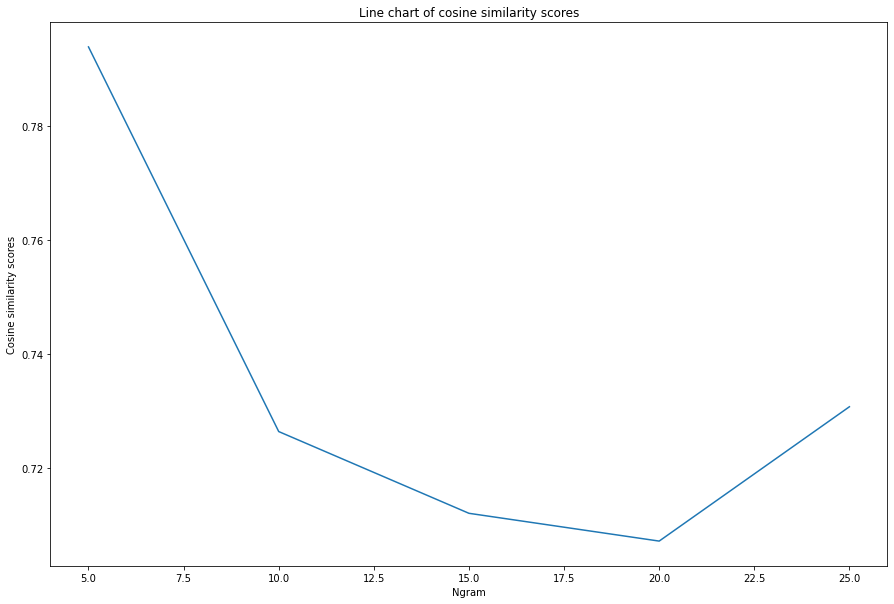

In [159]:
#creating the dataframe by using the dictionary
cosine_similar_ngram_df = pd.DataFrame({"Ngram":list(cos_sim_ngram.keys()), "Similarity_scores": list(cos_sim_ngram.values())})

#changing the size 
plt.rcParams['figure.figsize'] = [15, 10]

#plot the line graph
sns.lineplot(x = "Ngram", y = "Similarity_scores", data = cosine_similar_ngram_df)
    
plt.title("Line chart of cosine similarity scores")
plt.xlabel("Ngram")
plt.ylabel("Cosine similarity scores")
plt.show()